In [1]:
import random 
def random_kid():
    return random.choice(['boy','girl'])

both_girls=0
older_girl=0
either_girl=0
random.seed(0)
for _ in range(100000):
    younger=random_kid()
    older=random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger =='girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1
print(both_girls/older_girl)
print(both_girls/either_girl)    

0.49886036468330136
0.3327687383302214


In [2]:
import numpy as n
import matplotlib
import matplotlib.pyplot as plt
def uniform_pdf(x):
    return 1 if x>=0 and x<1 else 0
def uniform_cdf(x):
    if x<0: return 0
    elif x<1: return x 
    else: return 1
y=[]
for x in n.arange(-1,2,.1):
    y.append(uniform_cdf(x))
x=n.arange(-1,2,.1)
fig, ax = plt.subplots()
ax.plot(x, y)


ax.grid()

plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
import math
def normal_pdf(x,mu=0,sigma=1):
    ''' x is the value, mu is the mean, sigma is the standard variation'''
    sqrt_two_pi=math.sqrt(2*math.pi)
    return math.exp(-(x-mu) ** 2 / 2 / sigma **2)

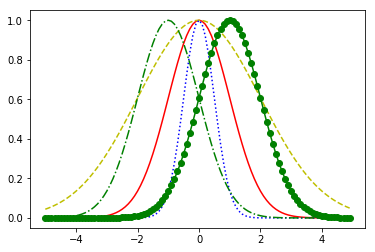

In [4]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=-1) for x in xs],'r-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'y--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],'b:',label='mu=0,sigma=.5')
plt.plot(xs,[normal_pdf(x,mu=1) for x in xs],'go-',label='mu=0,sigma=.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'g-.',label='mu=0,sigma=.5')

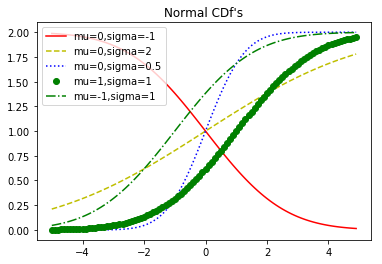

In [5]:
def normal_cdf(x,mu=0,sigma=1):
    return(1+math.erf((x-mu) / math.sqrt(2) / sigma / 2))
plt.plot(xs,[normal_cdf(x,sigma=-1) for x in xs],'r-',label='mu=0,sigma=-1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'y--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],'b:',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=1) for x in xs],'go',label='mu=1,sigma=1')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'g-.',label='mu=-1,sigma=1')
plt.legend(loc=2)
plt.title("Normal CDf's")
plt.show()

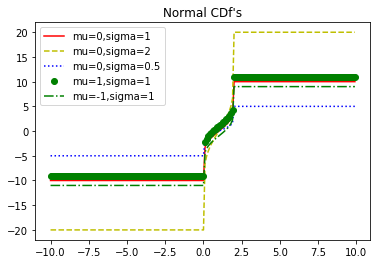

In [6]:
xs2 = [x / 10.0 for x in range(-100,100)]
def inverse_cdf(p,mu=0,sigma=1,tolerance=0.0001):
    if mu != 0 or sigma !=1:
        return mu +sigma * inverse_cdf(p,tolerance=tolerance)
    low_z, low_p = -10,0
    hi_z,hi_p = 10,1
    while hi_z - low_z > tolerance:
        mid_z = (low_z+hi_z)/ 2 
        mid_p = normal_cdf(mid_z)
        if mid_p < p: 
            low_z,low_p=mid_z,mid_p
        elif mid_p > p:
            hi_z,hi_p = mid_z,mid_p
        else:
            break
    return mid_z
plt.plot(xs2,[inverse_cdf(x,sigma=1) for x in xs2],'r-',label='mu=0,sigma=1')
plt.plot(xs2,[inverse_cdf(x,sigma=2) for x in xs2],'y--',label='mu=0,sigma=2')
plt.plot(xs2,[inverse_cdf(x,sigma=0.5) for x in xs2],'b:',label='mu=0,sigma=0.5')
plt.plot(xs2,[inverse_cdf(x,mu=1) for x in xs2],'go',label='mu=1,sigma=1')
plt.plot(xs2,[inverse_cdf(x,mu=-1) for x in xs2],'g-.',label='mu=-1,sigma=1')
plt.legend(loc=2)
plt.title("Normal CDf's")
plt.show()
